# Classification with the Perceptron Neural Network using Intel® Python

In this section, we will build the Perceptron Algorithm in Intel® Python. The principal idea is to train a single-layer neural network model to correctly data classify.

## Objectives

* **Understand** the concept of Single-layer Neural Network in the Perceptron
* **Learn** about the Perceptron Neural Network Algorithm
* **Create** a simple Perceptron Neural Network to data classification
* **Train** the Perceptron Neural Network Model
* **Observe** the performance of the trained Perceptron Neural Network Model

## The Problem: Classification Data

<p style='text-align: justify;'> 
Classification problems require the given data set to be classified into two or more categories. A simple example is buying something from the online portal now or waiting a couple of months to get the maximum discount. Or, if you are planning to buy a car, which car out of available options is the best buy given your budget? Classification problems can be of the following different types, for example:
</p>  

- Classifies data into two classes: yes/no, good/bad, and high/low.

- Classifies data into three or more categories. 

## The Solution: Perceptron Neural Network

<p style='text-align: justify;'> 
Perceptron Neural Network is an algorithm that imitate how a neuron in the brain works. It is also called a single-layer neural network consisting of a single neuron. The output of this neural network is decided based on the outcome of just one activation function associated with the single neuron. In perceptron, the forward propagation of information happens. A deep neural network consists of one or more perceptrons in two or more layers. Input to different perceptrons in a particular layer will be fed from the previous layer by combining them with different weights. 
</p>     

<p style="text-align: center;">
 <img src="images/perceptron2.png"  width="600" height="600">
</p>

<p style='text-align: justify;'>
Let us first understand how a neuron works. The diagram below represents a neuron in the brain. The input signals ($X_1$, $X_2$, ...) of different strength (observed weights, $W_1$, $W_2$, ...) is fed into the neuron cell as a weighted sum via dendrites. The weighted sum is termed the net input. The neuron processes the net input, and the output signal is appropriately fired. If the combined signal strength is inappropriate based on the decision function within the neuron cell, the neuron does not fire any output signal.  The perceptron, when represented as a line diagram, would look like the following with mathematical notations:   
</p>

<p style="text-align: center;">
 <img src="images/perceptron.png"  width="650" height="650">
</p>

Then just do $\sum_{i = 0}^{n} (W_i*X_i)$ where $n$ is the input data number, $W$ are the weights and $X$ are the inputs.
And then this result is activated by the activation function. Usually the sigmoid is used, but there are others.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

## Implementing the Perceptron Neural Network with Intel Python

Now that we have studied the Perceptron Algorithm, let is implement the actual algorithm in Python. Create a code will store our Perceptron implementation for a generical problem:

[-6.853343494406385, -6.261212314881444]
-6.853343494406385
0.0010548055343871582


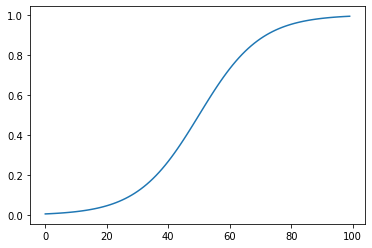

In [1]:
# Python Packages
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# Activation function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

plt.plot([sigmoid(x) for x in np.arange(-5,5,0.1)])

# Creating the perceptron weights
W = []
nInputs = 2

for i in range(nInputs):
    W.append(random.random() * 20 - 10)
print(W)

# Inputs
X = [1,0]

# Calculating answer
soma = 0
for i in range(len(W)):
    soma = soma + (W[i] * X[i])  
print(soma)

# Constract Python expression
soma = sum([w * x for w,x in zip(W, X)])

# Use the sigmoid function
activated = sigmoid(soma)
print(activated)

#### Discussion: What happened?

- ``Why is it advisable to initialize the weights randomly?``
     
- ``What is the meaning of the value of the sum of the weights and inputs submitted to the activation function?``

### ☆ Challenger: Classification of Roses and Violets  ☆

Consider the following problem:

**Roses are red, violets are blue, the stems of roses are tall, and violets are short.**

Then:

- Having the color spectrum between $red = 0$ and $blue = 10$.

- Between $0$ and $10$, there is a mixture of the two colors, where the closer to $0$ is redder, and the closer to $10$ is bluer.

- Given a set of pairs with (height and color) determine whether it is a rose or a violet.

<p style="text-align: center;">
 <img src="images/rosas.png"  width="500" height="500">
</p>


1. Create a Perceptron Neural Network with Python.

2. Formulate the labels (known data) for this problem.

3. Use the Perceptron to classify whether they are pink or violet, and answer:
    
    - ``How many did she get right and wrong?``
    
    - ``What is the problem?``

### ☆ Solution ☆ 

Click on the '...' below to show the solution.

## Example
<details>
    <summary>Click me</summary>

  ### Heading
  1. Foo
  2. Bar
     * Baz
     * Qux
     
  ### Some Code
  ```js
  function logSomething(something) {
    console.log('Something', something);
  }
  ```
</details>

[0.9999999999997455, 0.0009110511944006454]


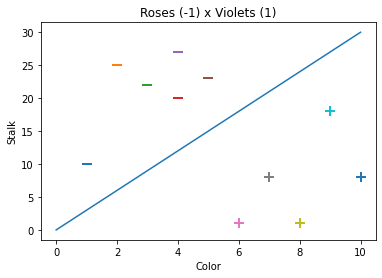

In [2]:
# Python Packages
import numpy as np
from matplotlib import pyplot as plt

# Inputs X(x1,x2) and y -> Roses (-1), Violets (1)
X = np.array([
             [ 1, 10],
             [ 2, 25],
             [ 3, 22],
             [ 4, 20],
             [ 4, 27],
             [ 5, 23],
             [ 6, 1],
             [ 7, 8],
             [ 8, 1],
             [ 9, 18],
             [ 10, 8],
                                   
])

y = np.array([-1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1])

# Perceptron Neural Network Module
def perceptron_sgd(X, Y, eta, epochs):
    # X --> Inputs
    # y --> labels/target
    # eta --> learning rate
    # epochs --> Number of iterations
    w = np.zeros(len(X[0]))

    for t in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

# Call the Perceptron Neural Network Module
eta = 1
epochs = 100
w = perceptron_sgd(X, y, eta, epochs)

# Use the sigmoid function
w = [sigmoid(x) for x in w]
print(w)

# Visualization - Plot the samples
for d, sample in zip(y,X):
    # Plot the negative samples (Roses)
    if d == -1:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples (Violets)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.xlabel('Color')
plt.ylabel('Stalk')
plt.title('Roses (-1) x Violets (1)')
plt.plot([0,10],[0,30])

## Summary

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

## Clear the Memory

Before moving on, please execute the following cell to clear up the CPU memory. This is required to move on to the next notebook.

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

## Next

In this section you learned how to build a simple Perceptron Neural Network with Python for data classification. In the next section, you will be asked to build your own Perceptron with perform data preparation to solve a different data classification with the concepts of BIAS in [_02-perceptron-bias.ipynb_](02-perceptron-bias.ipynb).